# Regression stability across bags

In [46]:
selection_methods = ['top_k', "top_k", "inflated_argmax", "avg_thresh"]
params = [[None,1,None], [None,2,None], [0.8,None,None], [None,None,0.3]]
markers = ["v", "D", "s", "X", "o"]
bags =  [10,100,1000,5000, 10000]
titles = ["argmax$\circ \mathcal{A}$", "top-2$\circ \\tilde{\mathcal{A}}_{K,B}$", "argmax$^{0.8}\circ \\tilde{\mathcal{A}}_{K,B}$", "ip$_{0.3}\circ \\tilde{\mathcal{A}}_{K,B}$"]

In [47]:
filepath = 'results/regression_rho0.99/bootstrap_lasso_selection_method_{}_epsilon{}_k{}_tol{}B{}.npy'

In [48]:
import numpy as np
import matplotlib.pyplot as plt
def percent_by_delta(res, deltas):
    stability_res = 1-res
    ge_delta = [np.mean(stability_res <= deltas[d]) for d in range(len(deltas))]
    return ge_delta


def plot_stability_across_bags(ax, filepath,selection_method,params, bags, label, markers, title, set_y_label):

    colors = plt.cm.viridis(np.linspace(0,1,len(bags)))

    deltas = np.linspace(0,1,100)
    for i in range(len(bags)):
        f   = np.load(filepath.format(selection_method, params[0],params[1], params[2],bags[i]))
        lst = percent_by_delta(f[:,0], deltas)

        ax.plot(deltas, lst, c = colors[i])
        ax.scatter(deltas[::10], lst[::10], marker=markers[i], label = label.format(bags[i]), c = colors[i])
    ax.set_xlabel("$\delta$", size = 12)
    if set_y_label:
        ax.set_ylabel("$\\frac{1}{N}\sum_{j=1}^N \mathbb{1}\{\delta_j \leq \delta \} $", size = 12)

    ax.set_ylim((0,1.05))
    ax.set_title(title,size = 15)


/tmp/ipykernel_402928/1500709091.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(deltas[::10], lst[::10], marker=markers[i], label = label.format(bags[i]), c = colors[i])


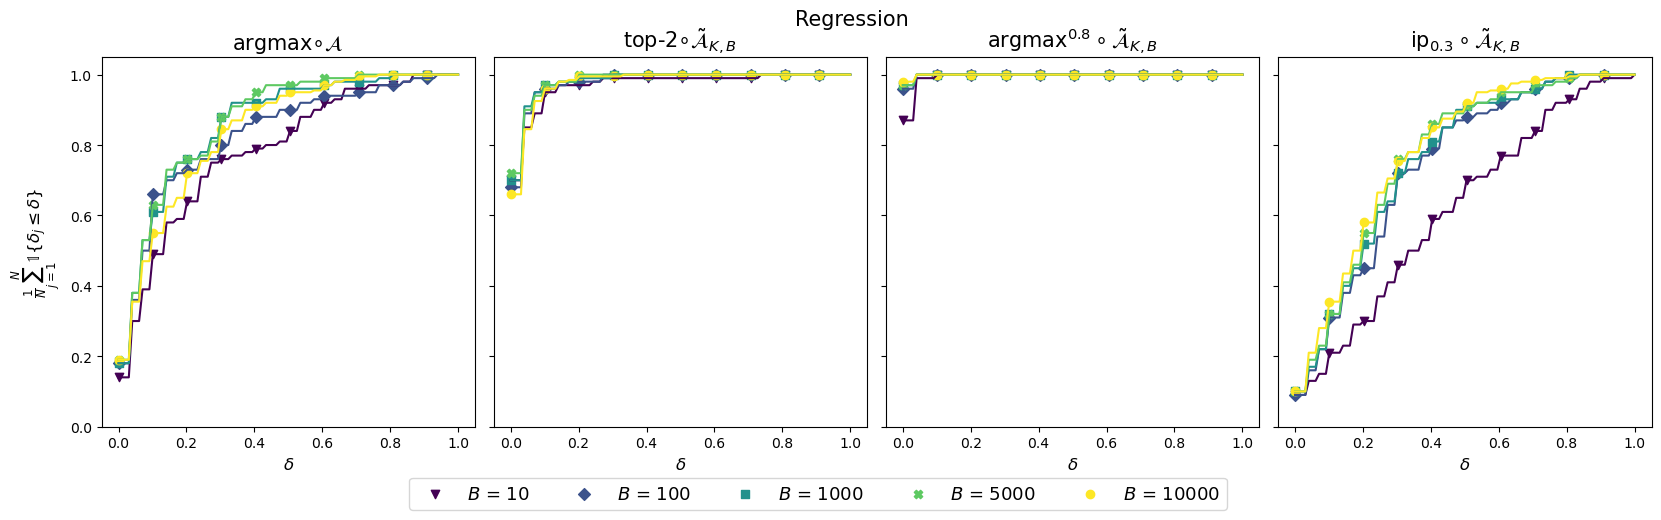

In [49]:

set_y_label = [True,False,False,False]
fig, axes = plt.subplots(1, 4, sharey=True)
fig.set_figwidth(20)
fig.subplots_adjust(wspace=0.05)
for i in range(len(selection_methods)):
    plot_stability_across_bags(axes[i], filepath, selection_methods[i], params[i], bags, label = "$B$ = {}", markers = markers, title = titles[i], set_y_label=set_y_label[i])

axes[1].legend(loc = "lower left", ncol=len(bags), bbox_to_anchor=(-0.25, -0.25, 0.5, 0.5), prop={'size': 13})
plt.suptitle("Regression",size = 15)
plt.savefig("figures/reg_stability_across_num_bags.png", dpi = 300, bbox_inches = "tight")

# Lotka-Volterra stability across bags

In [43]:
selection_methods = ['top_k', "top_k", "inflated_argmax", "avg_thresh"]
params = [[None,1,None], [None,2,None], [0.09,None,None], [None,None,0.63]]
markers = ["v", "D", "s", "X", "o"]
bags =  [10,100,1000,5000, 7000]
titles = ["argmax$\circ \mathcal{A}$", "top-2$\circ \\tilde{\mathcal{A}}_{K,B}$", "argmax$^{0.09}\circ \\tilde{\mathcal{A}}_{K,B}$", "ip$_{0.63}\circ \\tilde{\mathcal{A}}_{K,B}$"]
filepath = 'results/lotka_volterra/ensemble_sindy_selection_method_{}_epsilon{}_k{}_tol{}B{}.npy'

/tmp/ipykernel_402928/1500709091.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(deltas[::10], lst[::10], marker=markers[i], label = label.format(bags[i]), c = colors[i])


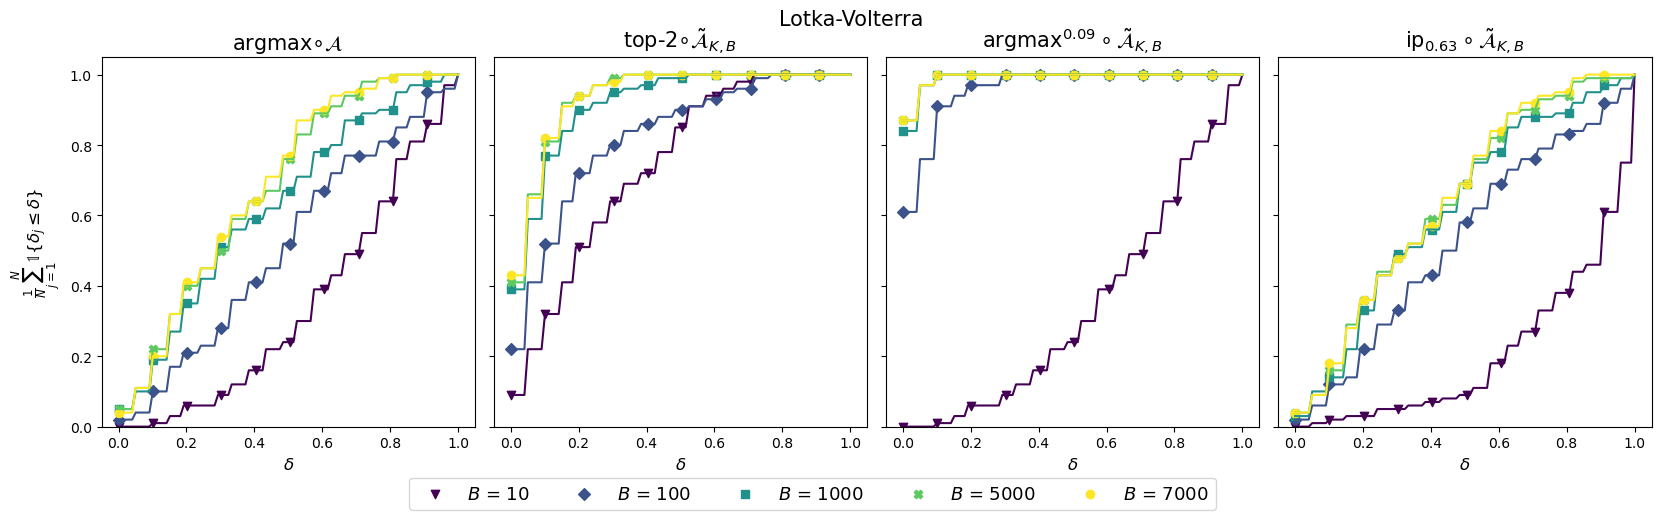

In [45]:

set_y_label = [True,False,False,False]
fig, axes = plt.subplots(1, 4, sharey=True)
fig.set_figwidth(20)
fig.subplots_adjust(wspace=0.05)
for i in range(len(selection_methods)):
    plot_stability_across_bags(axes[i], filepath, selection_methods[i], params[i], bags, label = "$B$ = {}", markers = markers, title = titles[i], set_y_label=set_y_label[i])

axes[1].legend(loc = "lower left", ncol=len(bags), bbox_to_anchor=(-0.25, -0.25, 0.5, 0.5), prop={'size': 13})
plt.suptitle("Lotka-Volterra",size = 15)
plt.savefig("figures/lv_stability_across_num_bags.png", dpi = 300, bbox_inches = "tight")

# Supplementary Regression Experiment

## One trial

/tmp/ipykernel_3238803/4290338504.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  weights = np.array([np.array([np.array(key)*1,d[key]])  for key in d.keys() if d[key] in top_k])
/tmp/ipykernel_3238803/4290338504.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  weights = np.array([np.array([np.array(key)*1,d[key]])  for key in d.keys() if d[key] in top_k])


[0.062 0.055 0.044 0.036 0.032 0.026 0.02  0.014 0.014 0.012]


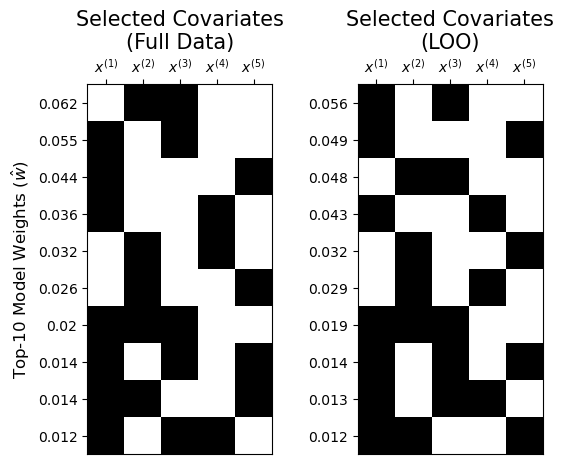

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
# results in regression_testlarger0.99: K= 25 , n = 300, d = 200, noise level 0.5, correlation 0.99
filepath = f"results/regression_testlarger0.99/prob_weights10000_dataset0JNone.pkl"


fig, axes = plt.subplots(1, 2)

with open(filepath, 'rb') as f:
        d = pickle.load(f)

k = 10
top_k = (-np.sort(-np.array(list(d.values()))))[:k]
weights = np.array([np.array([np.array(key)*1,d[key]])  for key in d.keys() if d[key] in top_k])
sort_idx = np.argsort(-weights[:,1])
axes[0].imshow(np.stack(weights[sort_idx][:,0],axis=0)[:,:5], cmap  = "Greys")
axes[0].set_xticks([0,1,2,3,4], ["$x^{(1)}$","$x^{(2)}$","$x^{(3)}$","$x^{(4)}$","$x^{(5)}$"])
axes[0].set_yticks(np.arange(10)[:k], np.round(top_k,3)) 
axes[0].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axes[0].set_title("Selected Covariates\n(Full Data)", size = 15)
axes[0].set_ylabel(f"Top-{k} "+"Model Weights ($\hat w)$",size = 12)

full_data_top1 = weights[sort_idx][0,0]
top2 = weights[sort_idx][1,0]


with open(filepath, 'rb') as f:
        d = pickle.load(f)

weights = -np.sort(-np.array(list(d.values())))
print(np.round(weights,3)[:10])

count_full = 0
count_second = 0
for j in range(300):

        filepath = f"results/regression_testlarger0.99/prob_weights10000_dataset0J{j}.pkl"


        with open(filepath, 'rb') as f:
                d = pickle.load(f)
        k = 10
        top_k = (-np.sort(-np.array(list(d.values()))))[:k]
        weights = np.array([np.array([np.array(key)*1,d[key]])  for key in d.keys() if d[key] in top_k])
        sort_idx = np.argsort(-weights[:,1])
        if tuple(weights[sort_idx][0,0]) == tuple(full_data_top1):
                count_full += 1
        if tuple(weights[sort_idx][0,0]) == tuple(top2):
                count_second += 1
        import matplotlib.pyplot as plt
        if j ==2:
                axes[1].imshow(np.stack(weights[sort_idx][:,0],axis=0)[:,:5], cmap  = "Greys")
                axes[1].set_xticks([0,1,2,3,4], ["$x^{(1)}$","$x^{(2)}$","$x^{(3)}$","$x^{(4)}$","$x^{(5)}$"])
                axes[1].set_yticks(np.arange(10)[:k], np.round(top_k,3)) 
                axes[1].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
                axes[1].set_title("Selected Covariates\n(LOO)", size = 15)
                plt.savefig("figures/appendix_instability.png", dpi = 300, bbox_inches = "tight")


In [57]:
# (number of LOO trials that correspond to the top model trained on the full dataset,
#  number of LOO trials that correspong to the second top model trained on the full dataset) 
count_full/300, count_second/300

(0.86, 0.14)

$$\delta = \frac{1}{\varepsilon^2}(\frac{1}{n-1}\frac{\rho}{1-\rho})$$

$$\varepsilon = \sqrt{\frac{1}{\delta}\left(\frac{1}{n-1}\frac{K/n}{1-K/n}\right)}$$

In [33]:
def solve_epsilon(delta, K, n):
    rho = K/n
    return np.sqrt(1/delta*(1/(n-1))*(rho)/(1-rho))

In [34]:
solve_epsilon(0.05, 25,300)

0.07797996951841567